## LES DECLARATIONS DE TOUTES LES FONCTIONS UTILISEE DANS CE NOTEBOOK EST ECRITES DANS UN FICHIER SEPARE NOME 'HelperFunctions'

In [1]:
# importer le fichier contenant les declarations des fonctions
import HelperFunctions as hf
%matplotlib inline

# Chargement et pretraitement des images

In [2]:
data = "../imgs"
imgs = hf.load_images(data)
# transformer les images en valeurs HU
hu_imgs = hf.get_hu(imgs)

le contenu des images selon les valeurs de l'unité Hounsfield

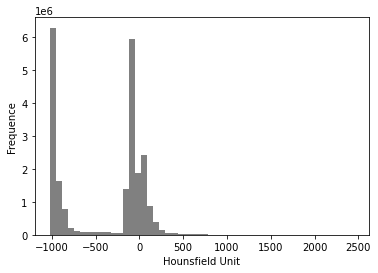

In [4]:
import matplotlib.pyplot as plt

plt.hist(hu_imgs.flatten(), bins=50, color="gray")
plt.xlabel("Hounsfield Unit")
plt.ylabel("Frequence")
plt.show()

on compare les differentes valeurs de l'unité Hounsfield pour chaque organes 

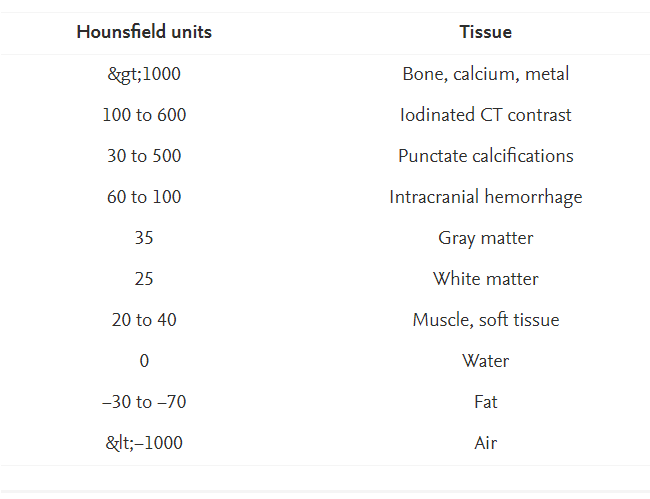
Imaging of Nontraumatic Abdominal Conditions Joshua Broder MD, FACEP, in Diagnostic Imaging for the Emergency Physician, 2011

on remarque que la plupart des regions des images sont:
* beaucoup d'air
* de l'eau
* du gras
* Tissus mous et muscles

Affichage des images

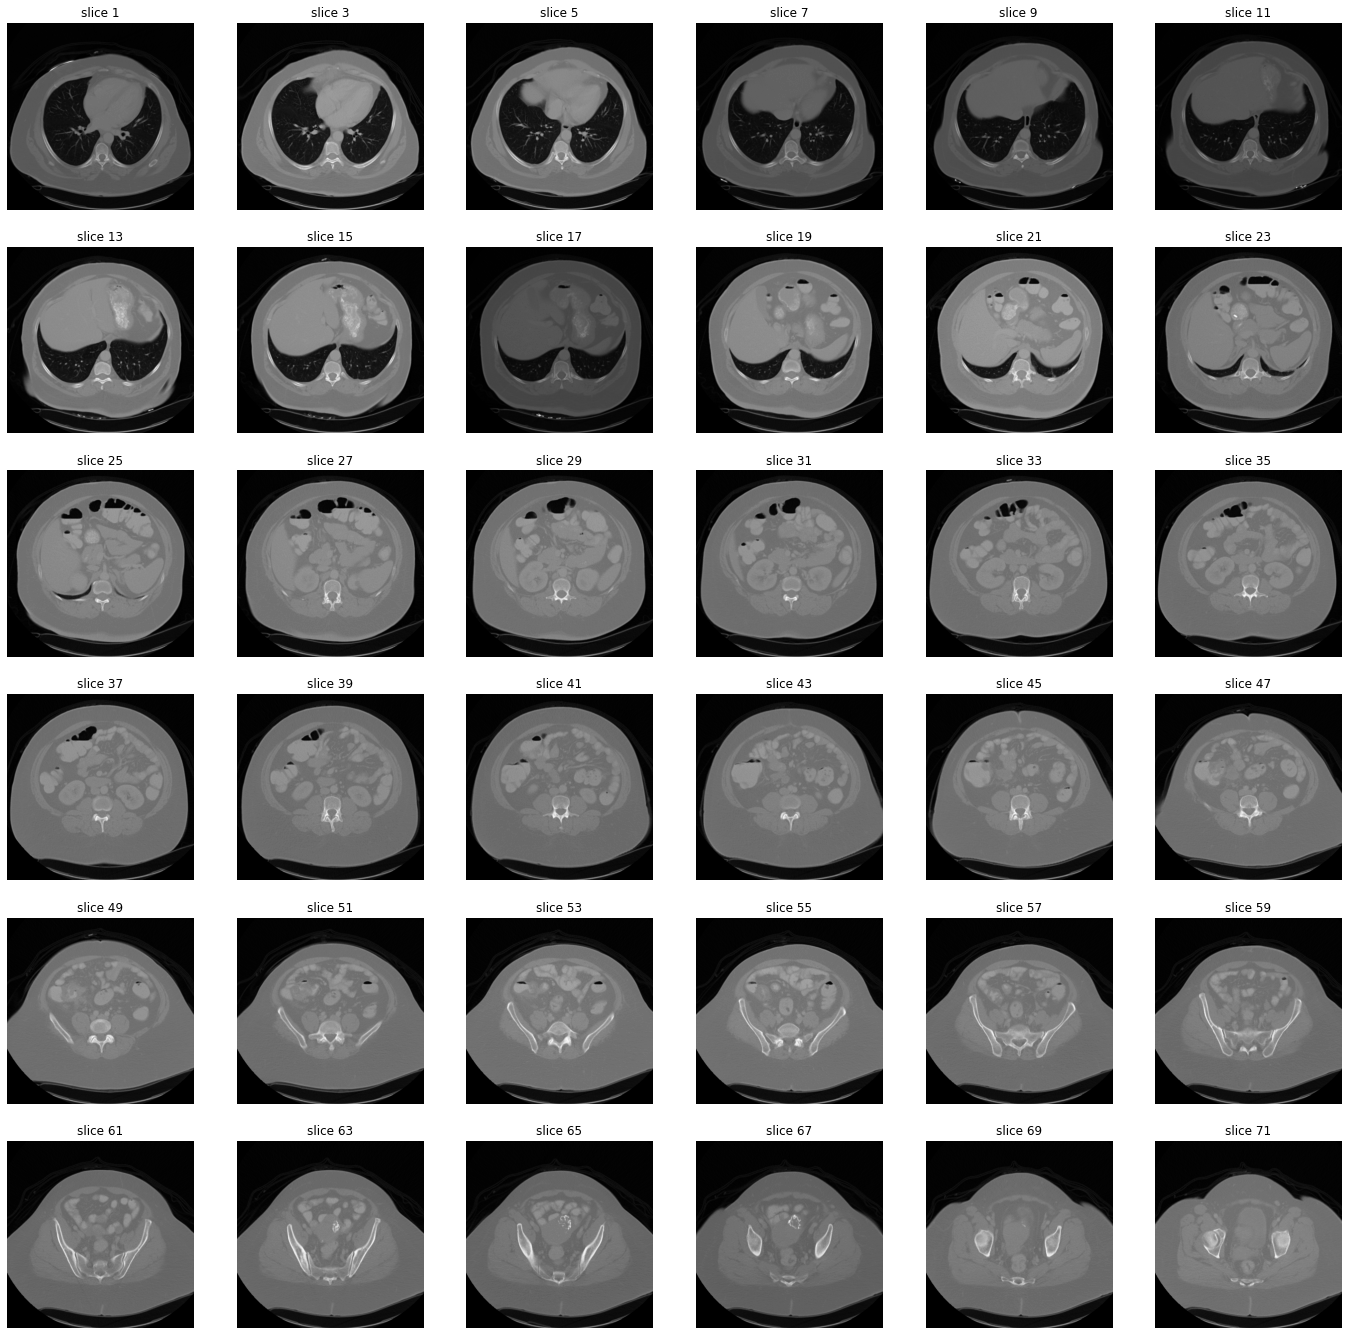

In [5]:
hf.img_stack(hu_imgs, rows=6, cols=6, start_with=1, step=2)

Effectuer un rééchantillonnage 

In [6]:
print ("Slice Thickness: %f" % imgs[0].SliceThickness)
print ("Pixel Spacing (row, col): (%f, %f) " % (imgs[0].PixelSpacing[0], imgs[0].PixelSpacing[1]))

Slice Thickness: 5.000000
Pixel Spacing (row, col): (0.806641, 0.806641) 


In [7]:
resampled_images, spacing = hf.resample(hu_imgs, imgs, new_spacing=[1,1,1])

In [8]:
print("Shape before resampling\t", hu_imgs.shape)
print("Shape after resampling\t", resampled_images.shape)

Shape before resampling	 (87, 512, 512)
Shape after resampling	 (435, 413, 413)


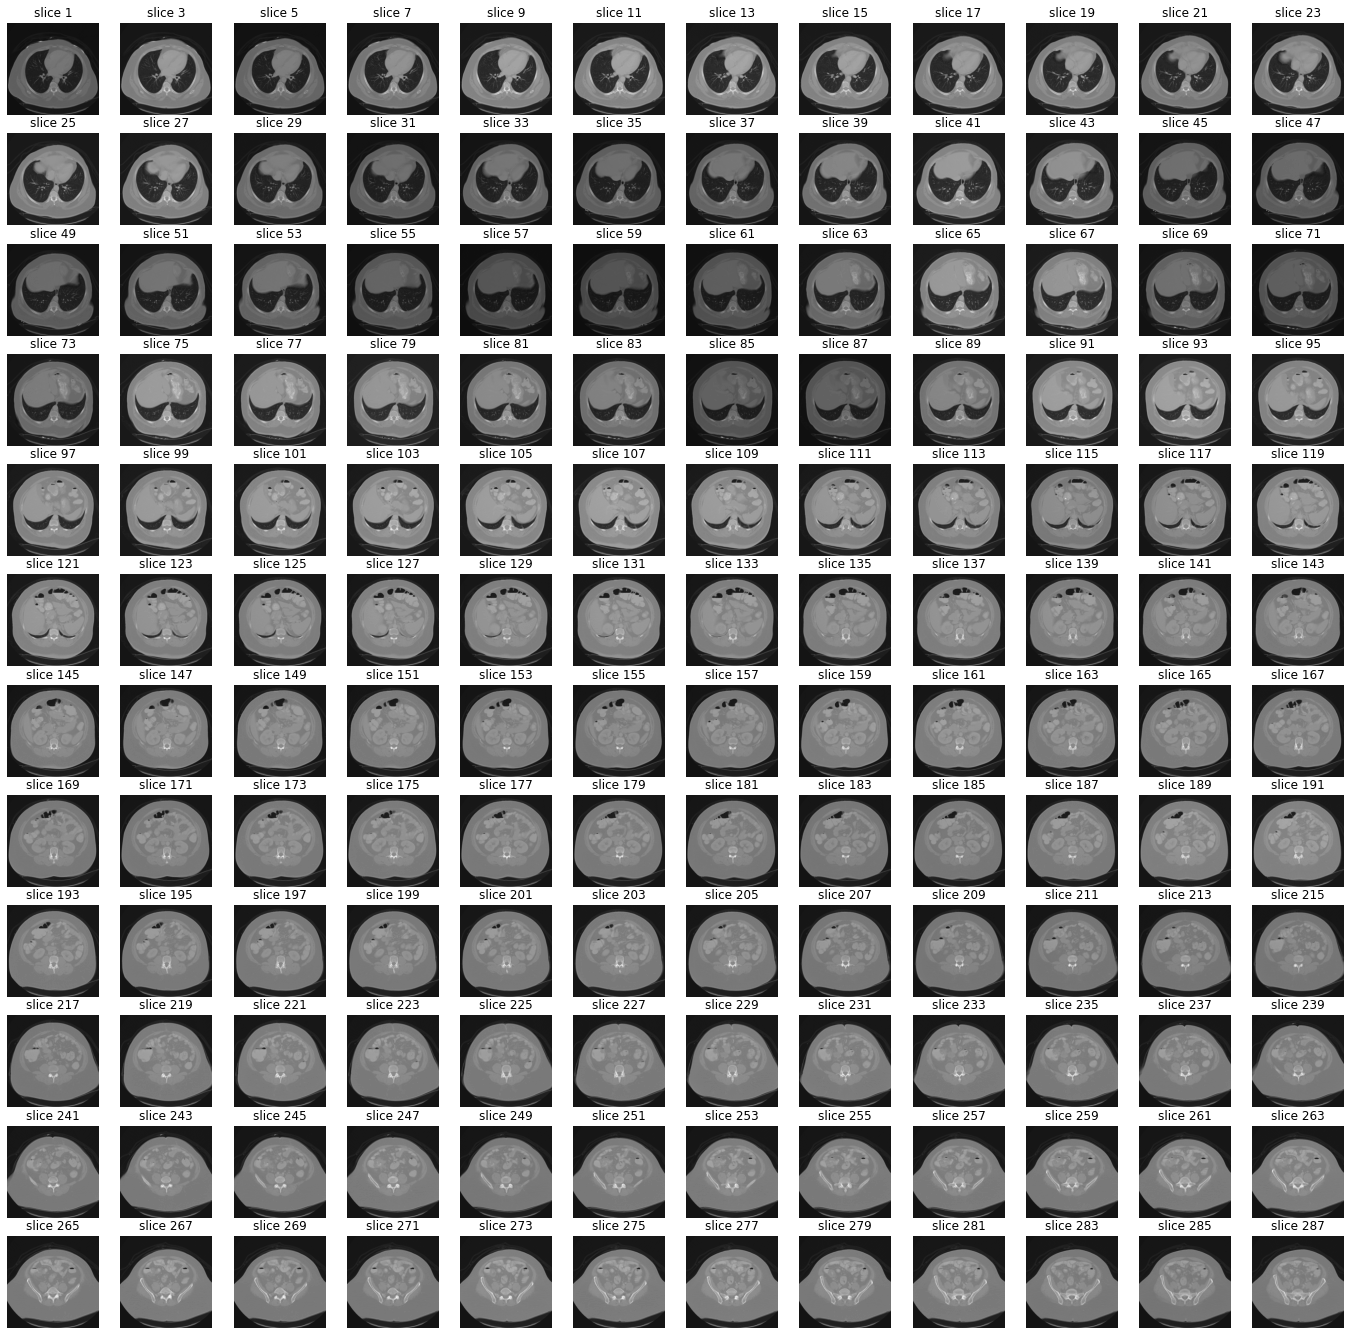

In [9]:
hf.img_stack(resampled_images, rows=12, cols=12, start_with=1, step=2)

# en ce qui suit on va segmenter l'image en appliquant un seuil sur chaque image, puis en utilisant l'algorithm de KMeans on va classer les régions de l'image et puis les étiqueter chaqu'une par une couleur différente; 
# enfin on va appliquer le mask sur l'image qui va séparer les régions n'appartenant pas à l'organe, qui peut être un cancer 

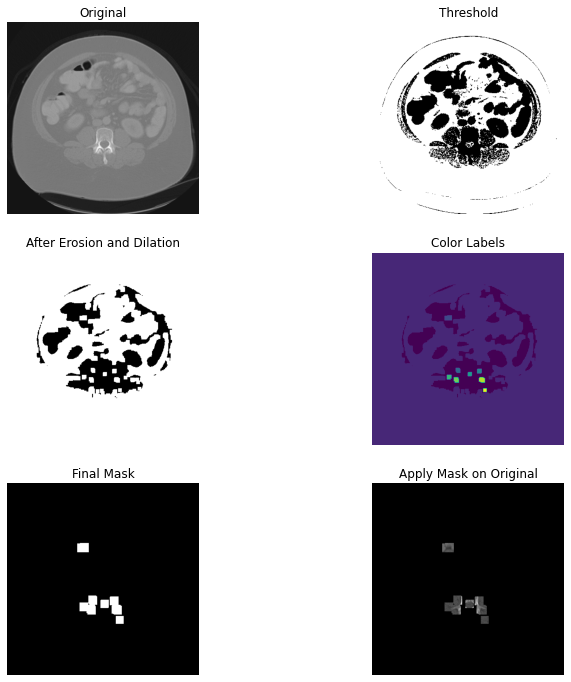

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [22]:
hf.make_mask(resampled_images[200], display=True)

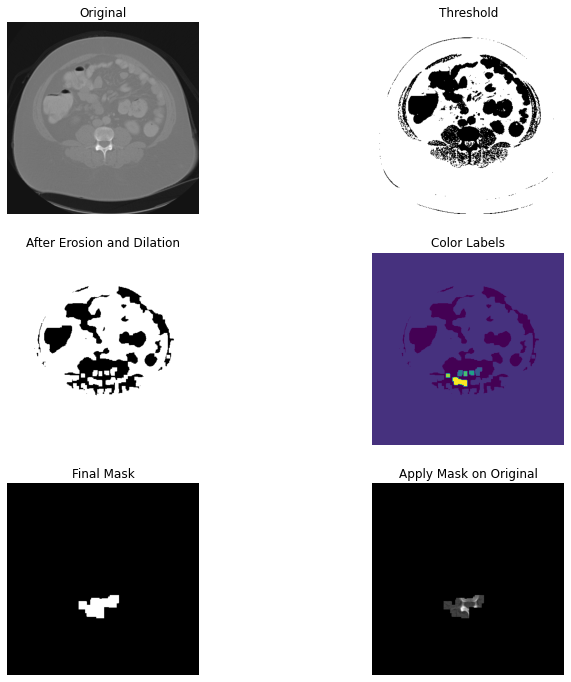

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [23]:
hf.make_mask(resampled_images[210], display=True)

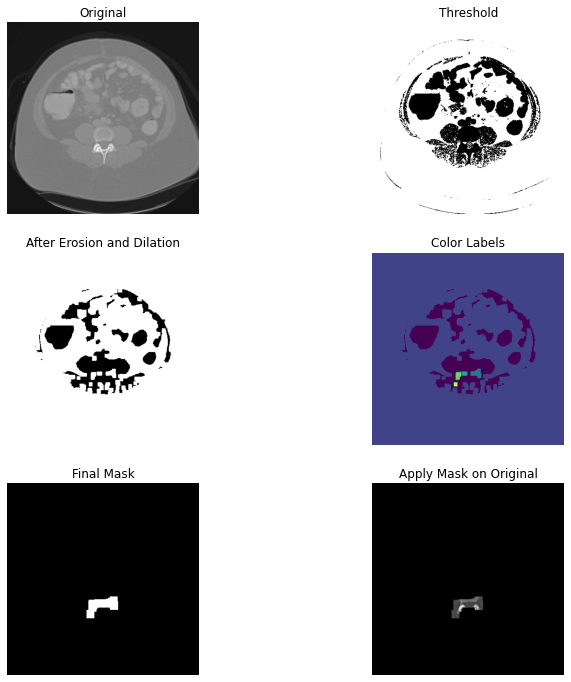

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [24]:
hf.make_mask(resampled_images[220], display=True)

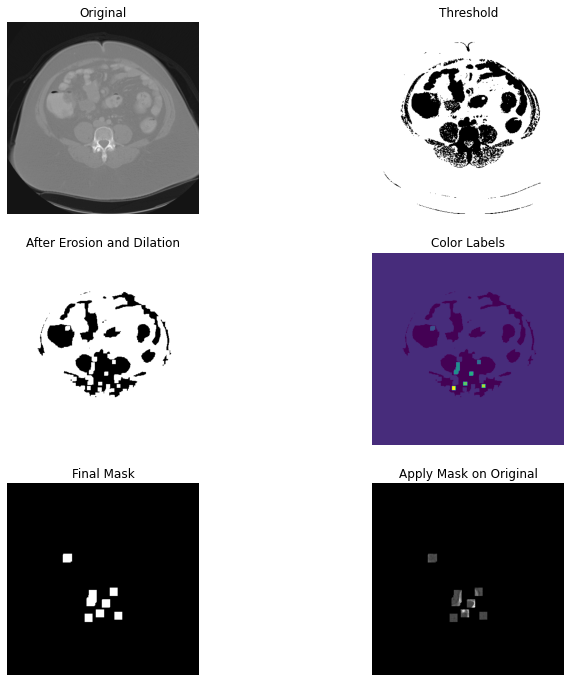

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [25]:
hf.make_mask(resampled_images[230], display=True)

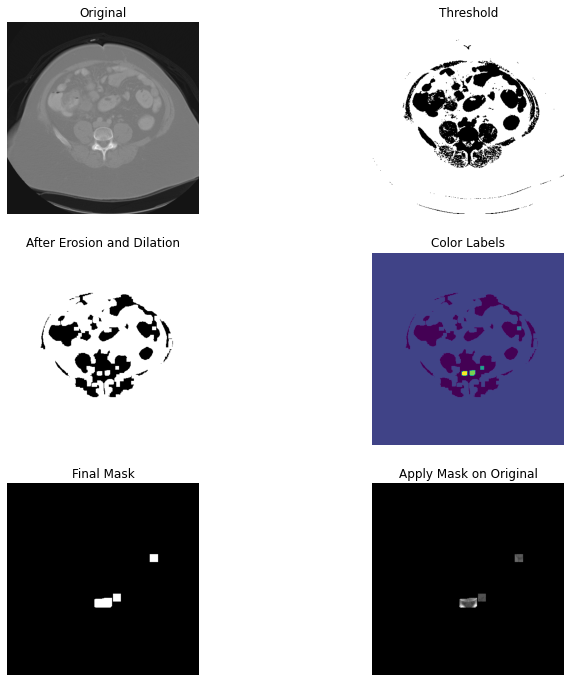

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [26]:
hf.make_mask(resampled_images[240], display=True)

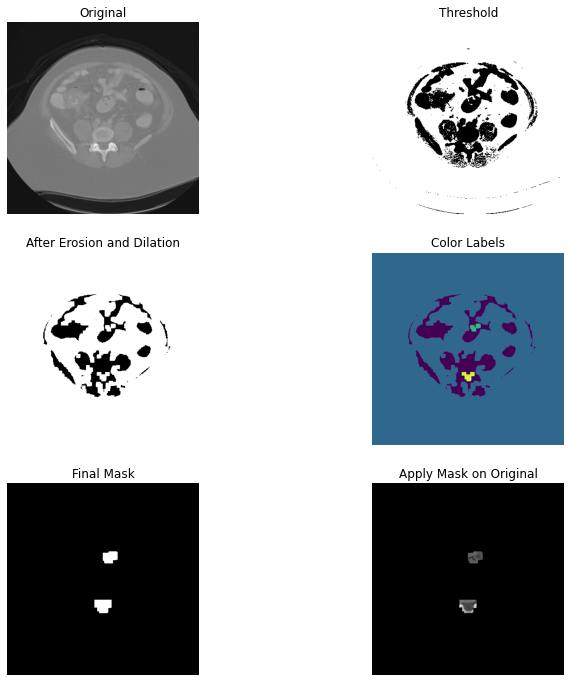

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [27]:
hf.make_mask(resampled_images[250], display=True)

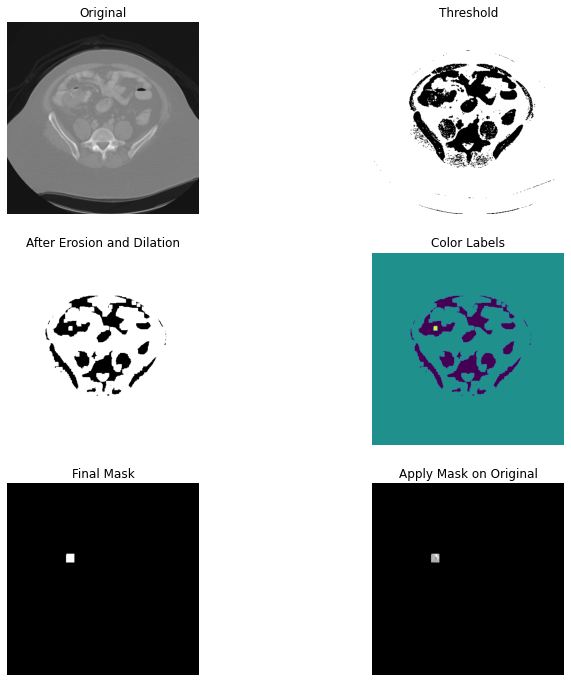

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [28]:
hf.make_mask(resampled_images[260], display=True)

# comme on voit dans les images, on a arrivé a sagmenter les tissus mous, qui entre essentiellement dans la compostion du, colon et d'autres ogranes,

saving the images

In [15]:
from numpy import save
output = '../results'
id = 0
save(output + 'fullimages_%d.npy' %(id), resampled_images)